## **Data overview**

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing
import re #pattern searching in a string
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import joblib
sns.set(style='darkgrid')

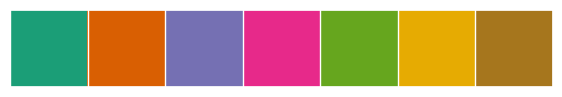

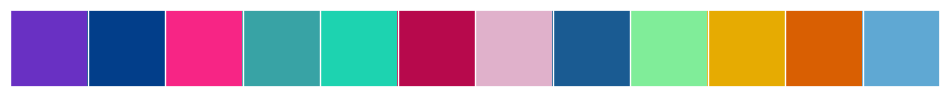

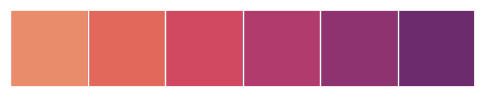

In [2]:
qual_colors1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
qual_colors1 = sns.color_palette(sns.color_palette(qual_colors1))
sns.palplot(qual_colors1)

qual_colors2 = ['#6930c3','#023e8a','#F72585','#38a3a5','#1dd3b0','#b7094c','#e0b1cb','#1a5b92','#80ed99','#e6ab02','#d95f02','#5fa8d3']
qual_colors2 = sns.color_palette(sns.color_palette(qual_colors2))
sns.palplot(qual_colors2)

num_pal = sns.color_palette("flare")
sns.palplot(num_pal)

In [3]:
df18 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2018.csv', parse_dates=['transaction_date'])
df19 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2019.csv', parse_dates=['transaction_date'])
df20 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2020.csv', parse_dates=['transaction_date'])
df21 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2021.csv', parse_dates=['transaction_date'])
df22 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2022.csv', parse_dates=['transaction_date'])


In [4]:
total = pd.concat([df18,df19,df20,df21,df22],axis=0)
print(total.shape)
total.sample(5)

(8454383, 12)


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
69486,309299109,403490400,923.8240,0.0,2018-08-19,MTR ITMTR00056 Brooklyn FF Olive 38,Mens Trouser - Workwear,Olive,38,West,West_7035,2018
2138715,315508994,707094069,0.0010,0.0,2022-03-20,CBG ITCBR00001 NA NA WHITE 12X4X16,CBG ITCBR00001 NA NA White 12x4x16``,NOT-CAPTURED,NOT-CAPTURED,South,South_7408,2022
2430439,516461840,732322377,2999.0000,0.0,2022-06-08,MSH ITMSH04357 Slim LS Blue L,MSH ITMSH04357 Slim LS Blue L,NOT-CAPTURED,NOT-CAPTURED,South,South_7002,2022
1390882,463914773,659667472,4.2275,603.0,2021-11-02,CBG ITCBR00001 NA NA WHITE 12X4X16,CBG ITCBR00001 NA NA White 12x4x16``,NOT-CAPTURED,NOT-CAPTURED,South,South_7184,2021
55761,463984568,635721211,1711.5984,0.0,2021-07-22,MDE ITMDN00461 Brooklyn 5P Dark Tint 38,MDE ITMDN00461 Brooklyn 5P Dark Tint 38,Dark Tint,38,West,West_7412,2021


In [5]:
def find_nan(df):
    columns = df.columns
    col_values = total.isna().sum().values
    temp = pd.DataFrame(data=col_values,index=columns,columns=['missing_count'])
    temp['percent_missing'] = np.round((temp['missing_count'] / total.shape[0]) *100 ,2)
    return temp

find_nan(total)

,missing_count,percent_missing
user_id,0,0.00
bill_id,0,0.00
line_item_amount,0,0.00
bill_discount,0,0.00
transaction_date,0,0.00
description,17,0.00
inventory_category,697444,8.25
colour,15555,0.18
size,15555,0.18
zone_name,0,0.00


In [6]:
# extract weekday and month from transaction date
total['month'] = total['transaction_date'].dt.month_name()
total['weekday'] = total['transaction_date'].dt.day_name()
total.sample(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
1532375,404283693,663465135,999.0,0.0,2021-11-07,SHirts,SHirts,NOT-CAPTURED,NOT-CAPTURED,ROOT,ROOT_ecomstore,2021,November,Sunday
621203,467423142,592891848,10.0,0.0,2020-12-20,CBG ITCBR00001 NA NA KHAKI 12X4X16,CARRY BAG,Navy,DEFAULT,South,South_7199,2020,December,Sunday


In [7]:
total.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,44 / 112CM,East,East_7096,2018,August,Saturday
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,32 / 97CM,North,North_7018,2018,July,Sunday
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,36 / 92CM,North,North_6505,2018,January,Friday
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,32 / 82CM,North,North_6505,2018,January,Wednesday
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,38 / 112CM,East,East_7310,2018,March,Thursday


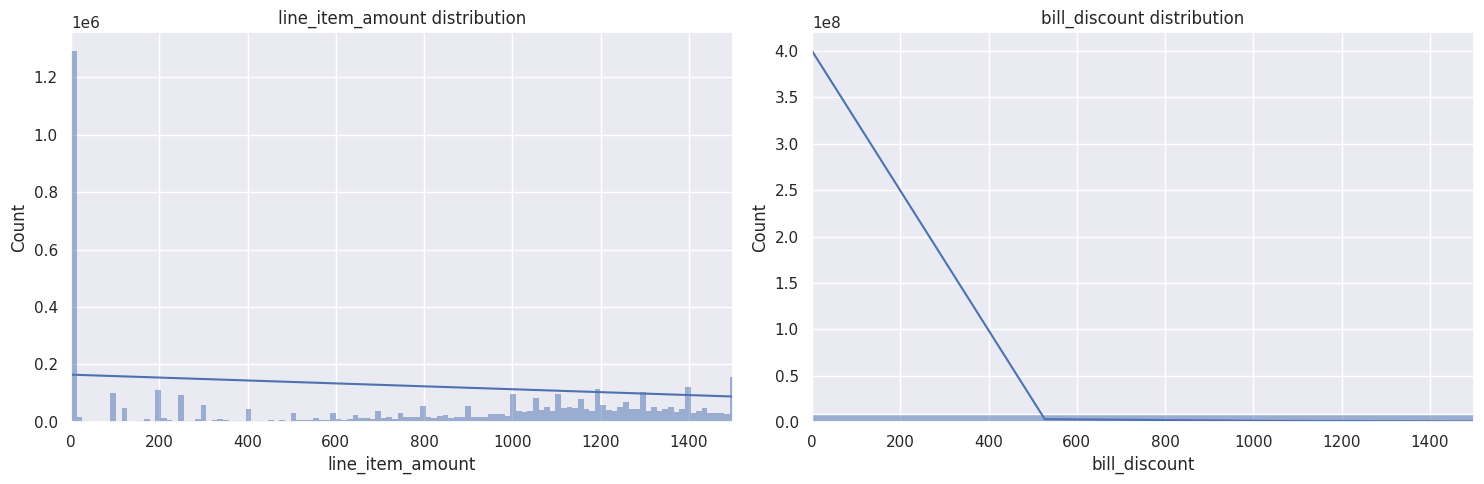

In [8]:
# numerical features distribution
fig , ax = plt.subplots(1,2,figsize=(15,5))
for i,col in enumerate(['line_item_amount','bill_discount']):
    sns.histplot(data=total,x=col,kde=True,ax=ax[i])
    ax[i].set_xlim([0,1500])
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col} distribution')

fig.tight_layout()
plt.show()

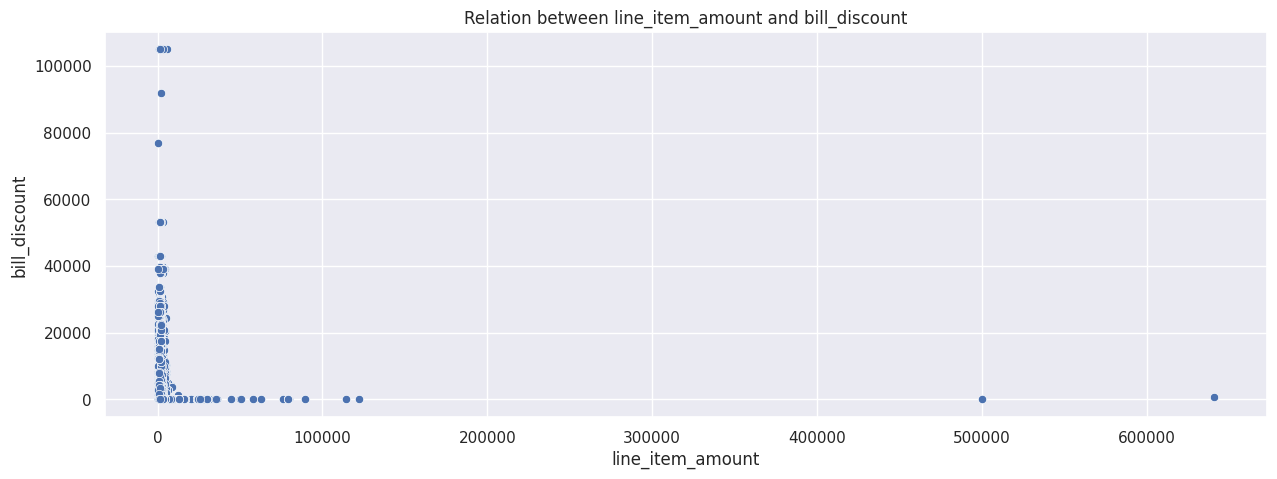

In [9]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=total,x='line_item_amount',y='bill_discount')
plt.title('Relation between line_item_amount and bill_discount')
plt.show()

## **Data Cleaning and FE**

In [10]:
def get_product(txt,pattern):
    if isinstance(txt, str):

        #search and check if split word exists
        searched_word = re.search(pattern, txt)

        #word exists
        if searched_word:
            splitted_string = re.split(pattern, txt)[0]
            # check if empty list is returned->when there is only pattern available in 'txt'
            if splitted_string == '':
                return 'Unknown'
            else:
                return splitted_string.strip()

        #split word not exists(but the product name can still be present , so we'll need the entire string)
        else:
            return txt

    # any other value found other than string datatype
    else:
        return 'Unknown'

total['desc_copy'] = total['description'].copy()
total['desc_copy'] = total['desc_copy'].fillna('Unknown')

#for patterns starting with IT,CORE-, A16-,A17-,S16-,S18-,TBA07SD7890(LENGTH=11)
total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))

#product names are acronyms are their lengths are not greater than 2.
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)

#removing inconsistent data
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)

In [11]:
# removing more inconsistent data
invalid_vals = ['CALandLine', 'CAMobile', 'Cashier','PendingOrders','DOB', 'DOA', 'LastVisit', 'Points',
'Anniversary', 'CashierMBO','OrderCashier','CreditLimit',
'DateOfAnniversary', 'OtherDetails', 'IsReminderRequired',
'AgreeToReceiveSMS', 'Gender', 'AwarenessSourceRemarks',
'AllowCredit', 'CreditDays', 'AgreeToReceiveCall', 'DateOfBirth','Administrator','MRPValue','CGST', 'BatchDescription',
'TaxDescription', 'IsActive', 'CardExpiryDate','DealerType','DND','DEFAULT']

total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)

In [12]:
total['ic_copy'] = total['inventory_category'].copy()
total['ic_copy'] = total['ic_copy'].fillna('Unknown')
total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))

total['colour'] = total['colour'].fillna('Unknown')
total['colour'] = total['colour'].str.replace('NOT-CAPTURED','Unknown')

total['size'] = total['size'].fillna('Unknown')
total['size'] = total['size'].str.replace('NOT-CAPTURED','Unknown')

In [13]:
## IDENTIFYING COLOURS
all_colours = total['colour'].value_counts().index.tolist()
pattern = r'\b(?:' + '|'.join(re.escape(color)  for color in all_colours if isinstance(color,str)) + r')\b'

def find(txt,pattern):
    x = re.findall(pattern, txt,flags=re.IGNORECASE)
    if x==[]:
        return ('Unknown')
    return ' '.join(x)

print('Unique colours count before:',len(total['colour'].unique()))

unknown_colours_bef = total[total['colour']=='Unknown'].shape[0]
total.loc[(total['colour']=='Unknown'),'colour'] = total.loc[(total['colour']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
unknown_colours_after = total[total['colour']=='Unknown'].shape[0]
print('Colours found: ',unknown_colours_bef - unknown_colours_after)

print('Unique colours count after:',len(total['colour'].unique()))

Unique colours count before: 402
Colours found:  2331166
Unique colours count after: 457


In [14]:
# colours with highest sales
highest_sales_colours = total[total['colour']!='Unknown'].groupby(['colour'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_colours[:20]

colour
Light Brown      5099.0000
Deep Grey        4499.2500
Teal+Choco       3999.0000
Fawn             3599.4000
Military         3599.4000
Navy+Choco       3119.4000
Blk+White        3119.4000
Silky            3082.8486
Slvr Grey        2969.0410
Denim            2786.7250
Black Matt       2699.4000
Olive Camo       2699.4000
Navy Camo        2699.4000
Burgandy         2699.0000
Black Mel        2619.2289
Midnight         2617.1702
Vintage Khaki    2599.0000
Sand Stone       2545.2908
Camel            2499.5000
Dk Brown         2499.0000
Name: line_item_amount, dtype: float64

In [15]:
## IDENTIFYING SIZE
all_size = total['size'].unique().tolist()
pattern = r'\b(?:' + '|'.join(re.escape(size) for size in all_size if isinstance(size,str)) + r')\b'

print('Unique size count before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,r'\d*x\d*x\d*|\d*mm|\d*cm|\d*m'))
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique size count after:',len(total['size'].unique()))

Unique size count before: 68
Sizes found:  2559280
Unique size count after: 129


In [16]:
def find_size(txt,pattern):
    try:

        x = re.findall(pattern,txt,flags=re.IGNORECASE)
        if x==[]:
            return ('Unknown')

        x =  ', '.join(x)
        if x != '':
            return (txt.split(x)[1])
    except:
        return 'Unknown'

print('Unique sizes before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find_size(row,r'Size'))
#some rows contains sizes seperated by ( , ) like m,s  which is incorrect as at a time a product can have only 1 size
total[['size']] = total[['size']].applymap(lambda x: x.split(' ')[-1].strip() if ' ' in x else x)
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique sizes after:',len(total['size'].unique()))

Unique sizes before: 129
Sizes found:  2146
Unique sizes after: 96


In [17]:
# comman sizes
comman_sizes = total[total['size']!='Unknown'].groupby(['size'])['size'].count().sort_values(ascending=False)
comman_sizes[:10]

size
M          1272218
L          1121393
S           812004
XL          616911
DEFAULT     587851
34          490535
32          407635
36          396651
2XL         358773
12x4x16     279502
Name: size, dtype: int64

In [18]:
replace = {'TR':'MENS TROUSER',
'MSP':'MENS SPORTSCOAT',
'BSP':'MENS SPORTSCOAT',
'TWB': 'MENS TROUSER WITH BELT',
'JKT': 'MENS JACKET',
'SH':'MENS SHIRT',
'MSH':'MENS SHIRT',
'MTR':'MENS TROUSER WITH BELT',
'MBL':'MENS BELT',
'BLT':'MENS BELT',
'SR':'MENS SHORTS',
'MTS':'MENS T-SHIRT',
'TS':'MENS T-SHIRT',
'BSH':'BOYS SHIRT',
'SW':'MENS SWEATER',
'BDE':'BOYS DENIM',
'MFW':'MENS FOOTWEAR',
'FW':'MENS FOOTWEAR',
'BDNM':'BOYS DENIM',
'SX':'MENS SOCKS',
'MSO':'MENS SHORTS',
'SO':'MENS SHORTS',
'MDE':'MENS DENIM',
'BTS':'BOYS T-SHIRT',
'BSO':'BOYS SHORTS',
'MDNM':'MENS DENIM',
'BTR':'BOYS TROUSER',
'MSW':'MENS SWEATER',
'SCKS':'MENS SOCKS',
'MSX':'MENS SOCKS',
'BSW':'BOYS SWEATER',
'MJKT':'MENS JACKET',
'MJA':'MENS JACKET',
'BJKT':'BOYS JACKET',
'BJO':'BOYS Jogger',
'MSC':'MENS JACKET',
'BS':'BOYS SHIRT',
'MWL':'Mens Wallet - Sportswear',
'BJA':'BOYS JACKET',
'BSR':'BOYS SHORTS',
'MDN':'MENS Denim Trouser',
'BDN':'Boys Denim Trouser - Jeanswear',
'KT':'MENS KNIT TROUSER',
'MJGR':'MENS JOGGER',
'TBG':'Trolley Bag',
'CBG':'CARRY BAG',
'MTIE':'MALE TIE',
'MJO':'MENS JOGGER',
'MWC':'MENS BANDI'}

total['product'] = total['product'].map(lambda x: replace[x] if x in replace.keys() else x)

## **Product Analysis**

In [19]:
print(total['line_item_amount'].describe())
print('-'*30)
print(total['bill_discount'].describe())

count    8.454383e+06
mean     1.334790e+03
std      9.843195e+02
min      0.000000e+00
25%      6.990000e+02
50%      1.352693e+03
75%      1.999000e+03
max      6.410010e+05
Name: line_item_amount, dtype: float64
------------------------------
count    8.454383e+06
mean     9.284983e+01
std      8.119705e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.049536e+05
Name: bill_discount, dtype: float64


In [20]:
## products with highest sales
highest_sales_products = total.groupby(['product'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_products[:10]

product
soap                      50000.0000
MENS SPORTSCOAT            4810.7656
MENS BANDI                 3373.9610
MENS JACKET                3060.1145
MENS Denim Trouser         2499.0000
MENS FOOTWEAR              1999.6000
MENS DENIM                 1999.0000
MENS TROUSER WITH BELT     1954.5580
MENS SHIRT                 1819.3000
MENS SWEATER               1679.4000
Name: line_item_amount, dtype: float64

In [21]:
# most discounted products
highest_discounted_products = total[total['product']!='Unknown'].groupby(['product'])['bill_discount'].median().sort_values(ascending=False)
highest_discounted_products[:5]

product
SHirts    151.85
soap        0.00
BWC         0.00
HHP         0.00
FFT         0.00
Name: bill_discount, dtype: float64

In [22]:
# comman(or most buyed) products
comman_products = total[total['product']!='Unknown'].groupby(['product'])['product'].count().sort_values(ascending=False)
comman_products[:5]

product
MENS SHIRT                2706356
MENS TROUSER WITH BELT    1175228
CARRY BAG                  808099
MENS T-SHIRT               521117
MENS DENIM                 470342
Name: product, dtype: int64

In [23]:
# sales of products with colour
products_with_colour = total[(total['product']!='Unknown')&(total['colour']!='Unknown')].groupby(['product','colour'])['line_item_amount'].median().reset_index().sort_values('line_item_amount',ascending=False)
products_with_colour[:10]

,product,colour,line_item_amount
1100,MENS SPORTSCOAT,Beige,6299.10000
1112,MENS SPORTSCOAT,Lt Grey,6249.00000
1109,MENS SPORTSCOAT,Khaki,5978.52250
741,MENS JACKET,Ink Blue,5858.02880
1117,MENS SPORTSCOAT,Sky,5749.00000
1118,MENS SPORTSCOAT,Wine,5749.00000
1108,MENS SPORTSCOAT,Indigo,5749.00000
745,MENS JACKET,Lt Khaki,5637.78100
1113,MENS SPORTSCOAT,Maroon,5365.10665
1111,MENS SPORTSCOAT,Lt Brown,5264.77830


In [24]:
# highest sales of products with size
products_with_size = total[(total['product']!='Unknown')&(total['size']!='Unknown')].groupby(['product','size'])['line_item_amount'].median().sort_values(ascending=False)
products_with_size[:10]

product          size
MENS SPORTSCOAT  2XL     4983.27150
                 S       4873.83600
                 M       4806.75100
                 L       4798.96000
                 XL      4798.88000
                 3XL     4388.46420
MENS BANDI       S       3446.53660
                 M       3427.55100
                 2XL     3372.90575
                 XL      3353.79170
Name: line_item_amount, dtype: float64

## **Time Analysis**

In [25]:
# What is the total revenue for every year?
total_sales_every_year = total.groupby(['year'])['line_item_amount'].sum()
total_sales_every_year

year
2018    1.900333e+09
2019    2.103860e+09
2020    1.579160e+09
2021    2.302388e+09
2022    3.399087e+09
Name: line_item_amount, dtype: float64

In [26]:
def lineplot(data,x,y,hue,hue_order,title=None,xlabel=None):
    plot = sns.lineplot(data=data,x=x,y=y,markers=True, dashes=True,hue=hue,hue_order=hue_order,style=hue,palette=qual_colors2)
    plt.xlabel(xlabel)
    plt.ylabel(f'{y}')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plot

def barplot(x,y,data=None,ax=None,order=None,palette=qual_colors2,labelrotation=0,title=None):
    plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
    ax.bar_label(plot1.containers[0])
    ax.set_xlabel('')
    ax.set_ylabel(f'{y}')
    ax.set_title(title)
    ax.tick_params(labelrotation=labelrotation)
    return plot1

/tmp/ipykernel_1514/658967557.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


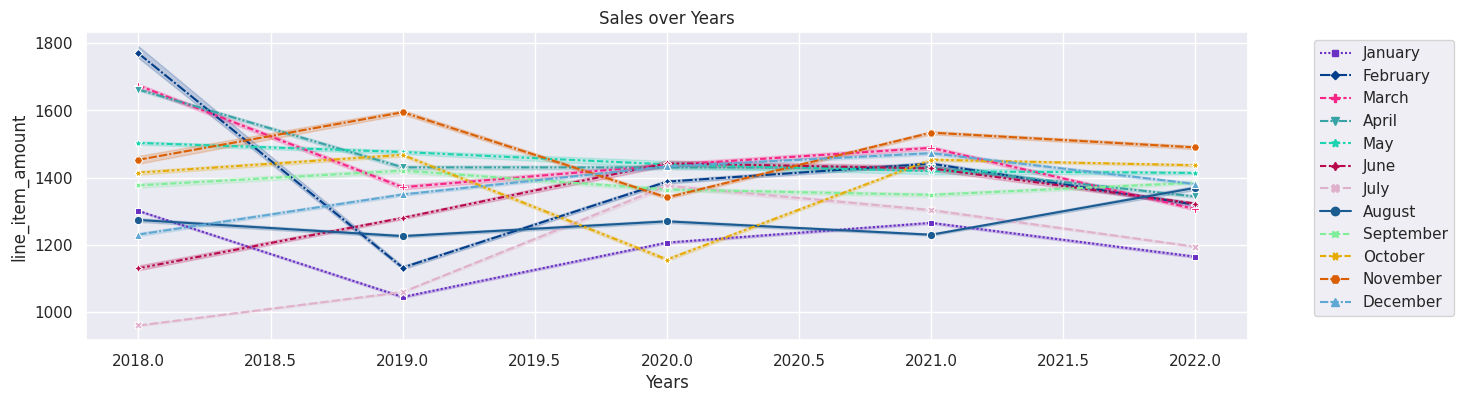

In [27]:
# What are the sales trends over different years or months?
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig = plt.figure(figsize=(15,4))
lineplot(data=total,x="year",y='line_item_amount',hue='month',hue_order=month_order,title='Sales over Years',xlabel='Years')
# fig.supxlabel('Years')
fig.show()

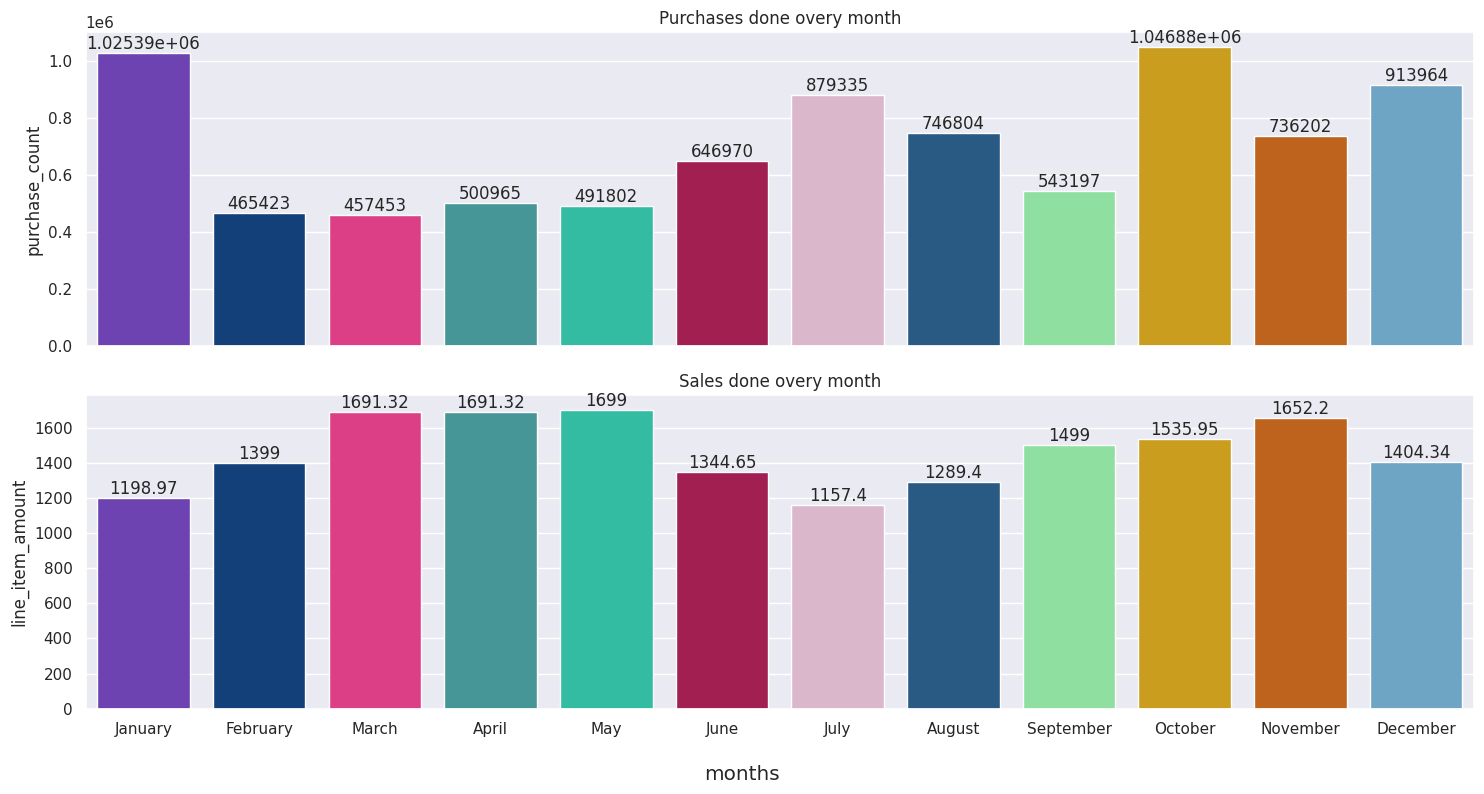

In [28]:
# number of purcheses made each month
purchases_on_each_month = pd.DataFrame(total.groupby(['month'])['month'].count()).rename(columns={'month':'purchase_count'}).reset_index()

# average sales on each month
sales_on_months = total.groupby(['month'])['line_item_amount'].median().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_each_month,x='month',y='purchase_count',ax=ax1,order=month_order,title='Purchases done overy month')

barplot(data=sales_on_months,x='month',y='line_item_amount',ax=ax2,order=month_order,title='Sales done overy month')
fig.supxlabel('months')

fig.tight_layout()

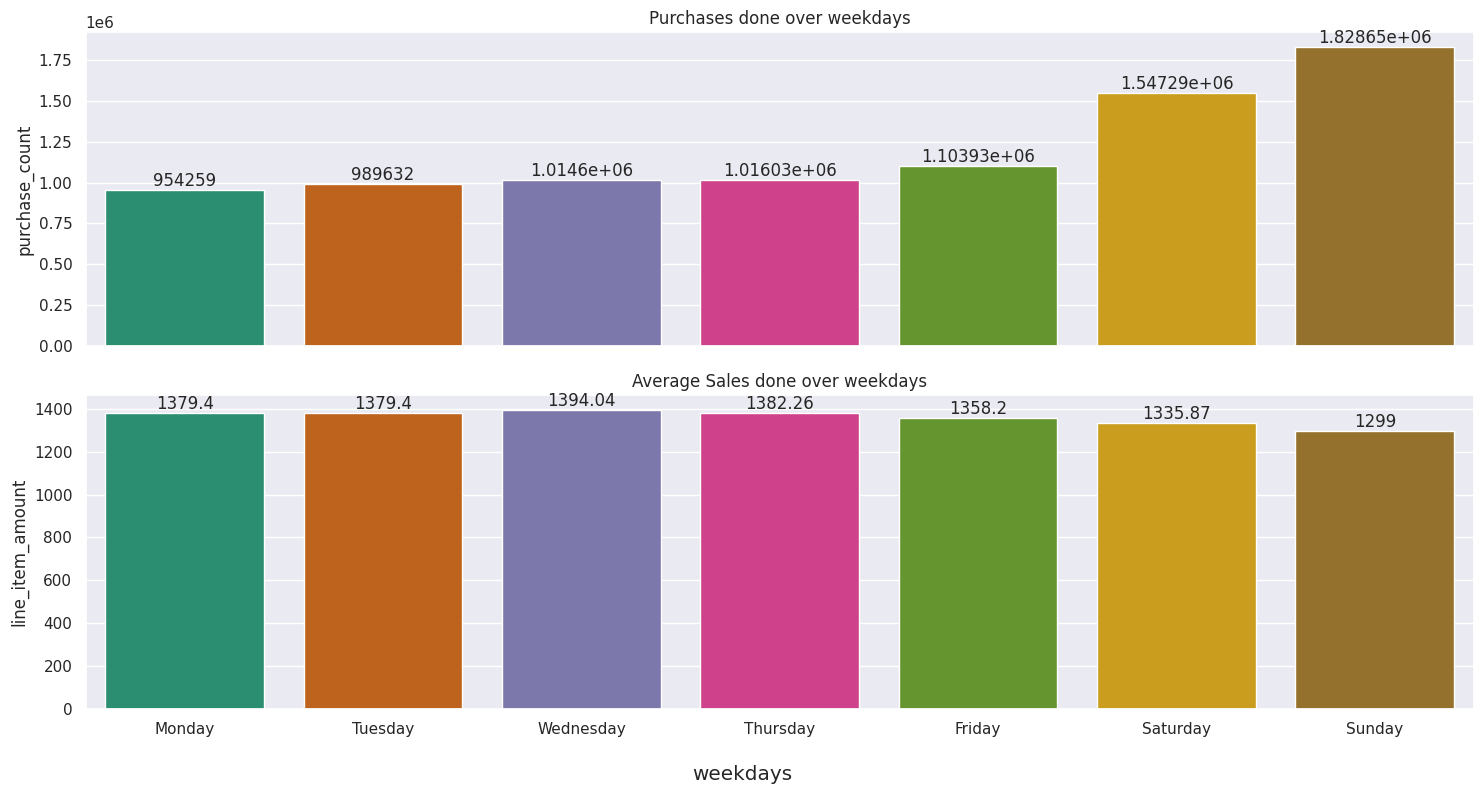

In [29]:
# What are the busiest shopping times of the day or week?
purchases_on_weekdays = pd.DataFrame(total.groupby(['weekday'])['weekday'].count()).rename(columns={'weekday':'purchase_count'}).reset_index()

# average sales on each weekday
sales_on_weekdays = total.groupby(['weekday'])['line_item_amount'].median().reset_index()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_weekdays,x='weekday',y='purchase_count',ax=ax1,order=week_order,palette=qual_colors1,title='Purchases done over weekdays')

barplot(data=sales_on_weekdays,x='weekday',y='line_item_amount',ax=ax2,order=week_order,palette=qual_colors1,title='Average Sales done over weekdays')
fig.supxlabel('weekdays')

fig.tight_layout()

In [30]:
# Which products are most buyed on each year
yearly_most_buyed = total[(total['product']!='Unknown')].groupby(['year','product'])['product'].count().sort_values(ascending=False)
yearly_most_buyed[:10]

year  product               
2022  MENS SHIRT                846856
2019  MENS SHIRT                588494
2021  MENS SHIRT                551088
2020  MENS SHIRT                420666
2022  MENS TROUSER WITH BELT    362136
2018  MENS SHIRT                299252
2022  CTRIMS                    275206
2019  MENS TROUSER WITH BELT    270771
2021  MENS TROUSER WITH BELT    236944
2019  CARRY BAG                 234958
Name: product, dtype: int64

In [31]:
# Which products are most buyed on each month and weekday
monthly_most_buyed = total[(total['product']!='Unknown')].groupby(['month','weekday','product'])['product'].count().sort_values(ascending=False)
monthly_most_buyed[:10]

month     weekday   product   
January   Sunday    MENS SHIRT    80751
October   Sunday    MENS SHIRT    73653
January   Saturday  MENS SHIRT    69099
October   Saturday  MENS SHIRT    65622
July      Sunday    MENS SHIRT    64139
August    Sunday    MENS SHIRT    58776
December  Sunday    MENS SHIRT    58139
July      Saturday  MENS SHIRT    54972
December  Saturday  MENS SHIRT    54725
August    Saturday  MENS SHIRT    51285
Name: product, dtype: int64

## **Store Performance**

/tmp/ipykernel_1514/3723680954.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


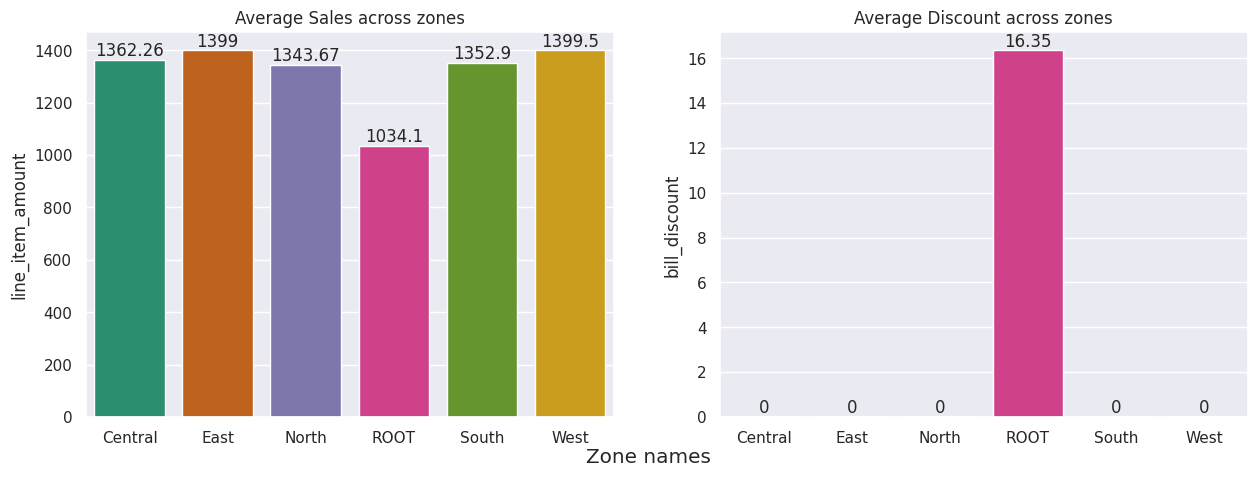

In [32]:
#  How does store performance vary by zone?
zones_sales_mean = total.groupby(['zone_name'])['line_item_amount'].median().reset_index()
zones_discount_mean = total.groupby(['zone_name'])['bill_discount'].median().reset_index()

fig,(ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

barplot(data = zones_sales_mean , x='zone_name',y='line_item_amount',ax=ax1,palette=qual_colors1,title='Average Sales across zones')

barplot(data = zones_discount_mean ,x='zone_name',y='bill_discount',ax=ax2,palette=qual_colors1,title='Average Discount across zones')

fig.supxlabel('Zone names')
fig.show()

/tmp/ipykernel_1514/3156662952.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


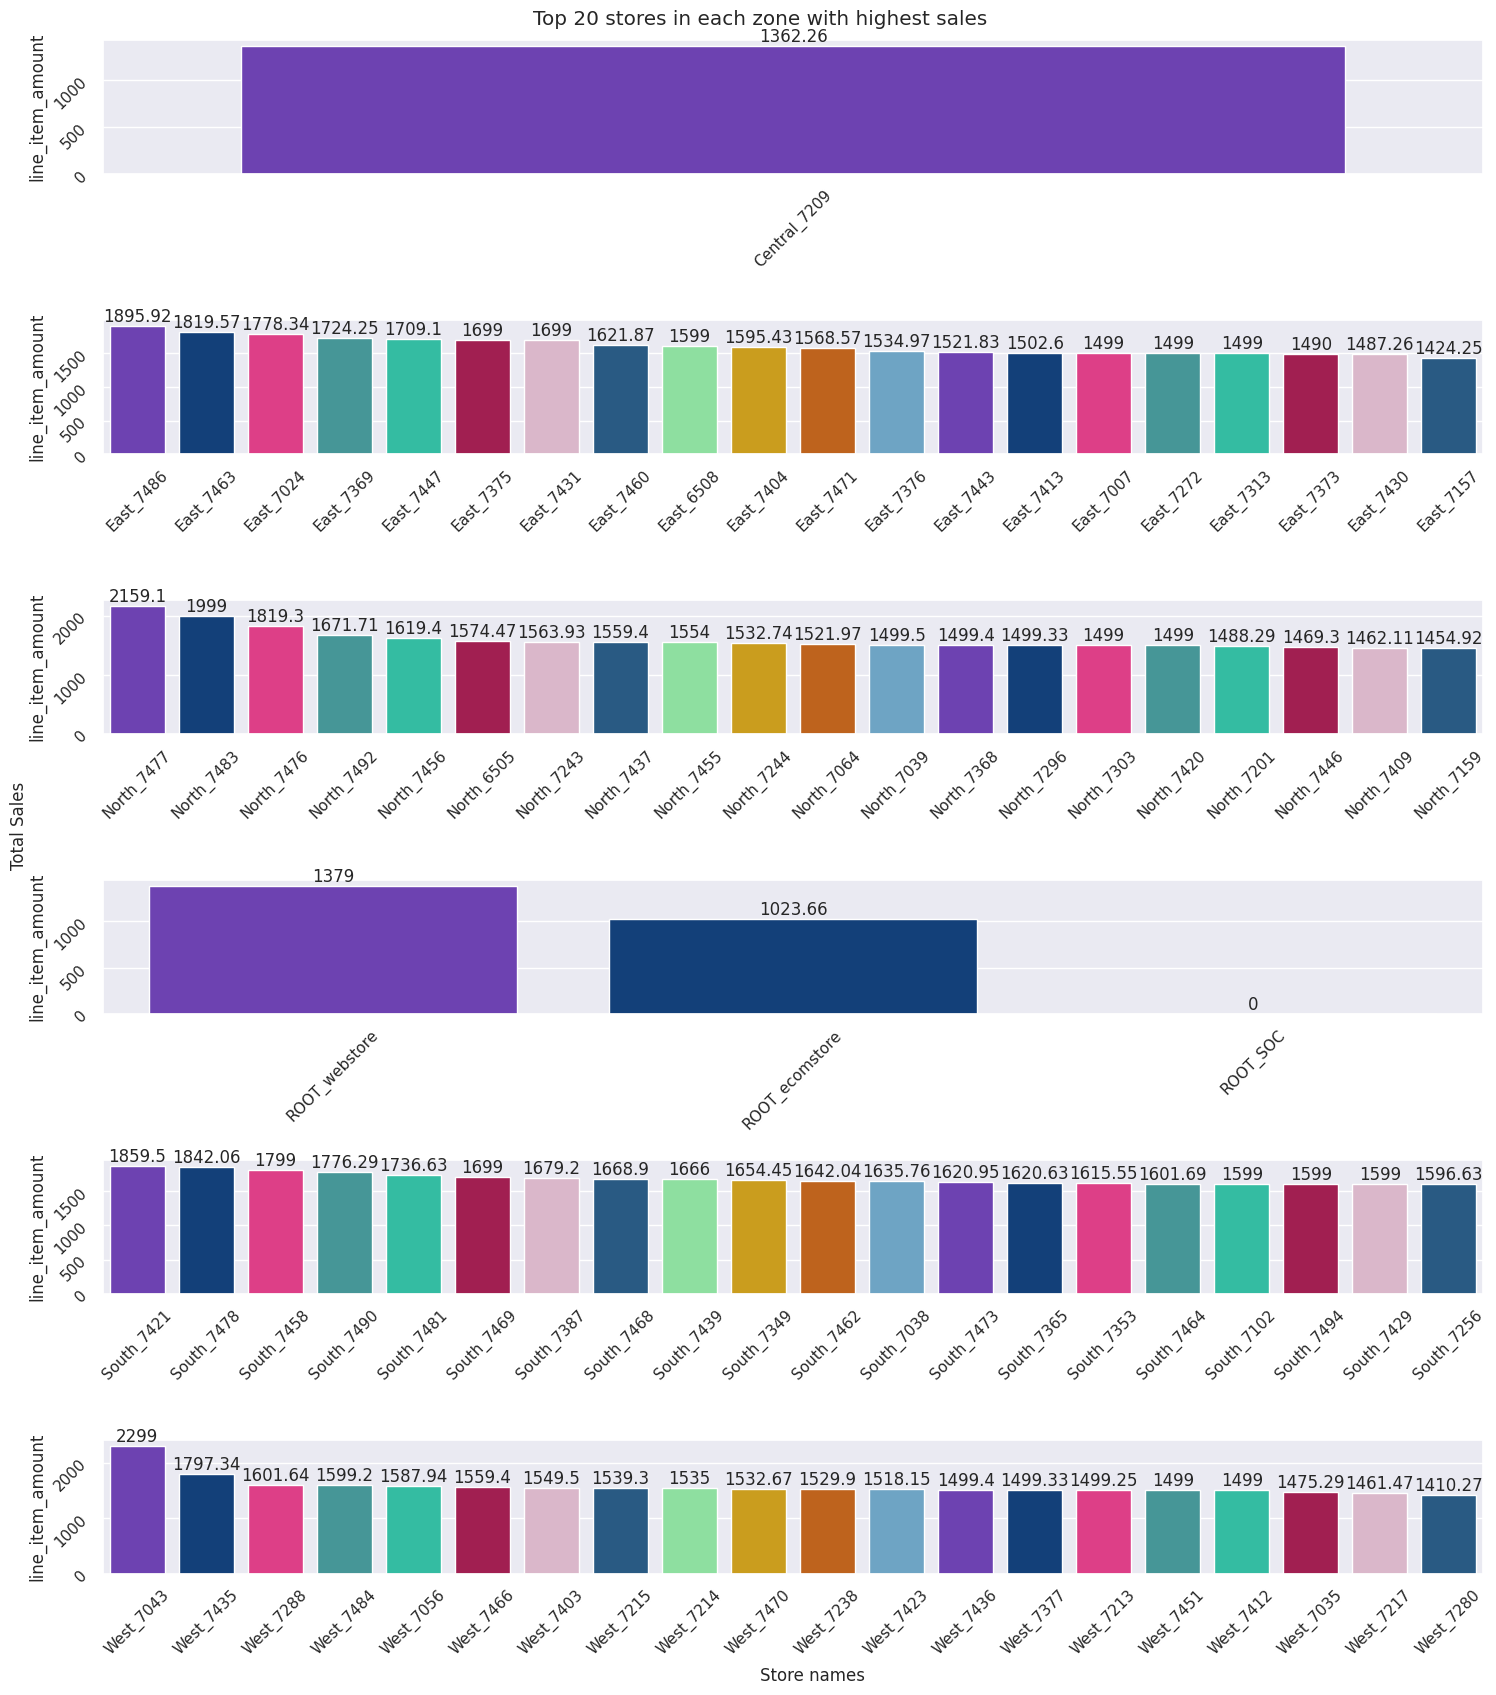

In [33]:
# stores from each zones with highest sales
zone_and_store_sales = total.groupby(['zone_name','store_name'])['line_item_amount'].median().reset_index()

# sales in different zones stores
zones = zone_and_store_sales.zone_name.unique().tolist()

fig , ax = plt.subplots(6,figsize=(15,17))

for i,zone in enumerate(zones):
    stores_with_highest_sales = zone_and_store_sales[zone_and_store_sales['zone_name']==zone].sort_values('line_item_amount',ascending=False)[:20]

    bar = barplot(data = stores_with_highest_sales , x='store_name',y='line_item_amount',ax=ax[i],labelrotation=45,title='')

fig.suptitle('Top 20 stores in each zone with highest sales')
fig.tight_layout()

fig.text(0.00, 0.5, 'Total Sales', va='center', rotation='vertical')
fig.text(0.5, 0, 'Store names', va='center')

fig.show()

In [34]:
df_null = round(100*(total.isnull().sum())/len(total), 2)
df_null

user_id               0.00
bill_id               0.00
line_item_amount      0.00
bill_discount         0.00
transaction_date      0.00
description           0.00
inventory_category    8.25
colour                0.00
size                  0.00
zone_name             0.00
store_name            0.00
year                  0.00
month                 0.00
weekday               0.00
desc_copy             0.00
product               0.00
ic_copy               0.00
dtype: float64

We are going to analysis the Customers based on below 3 factors:¶

R (Recency): Number of days since last purchase
F (Frequency): Number of tracsactions
M (Monetary): Total amount of transactions (revenue contributed)

## **Apriori apply test**

In [35]:
from mlxtend.frequent_patterns import association_rules, apriori

In [36]:
# Create a copy of 'total' and drop rows with missing values
retail = total.dropna()

# Display the shape of the new 'retail' DataFrame
print(retail.shape)


(7756929, 17)


In [37]:
# Cleaning the description column
retail['product'] = retail['product'].astype(str).str.strip().str.lower()


/tmp/ipykernel_1514/3387494942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['product'] = retail['product'].astype(str).str.strip().str.lower()


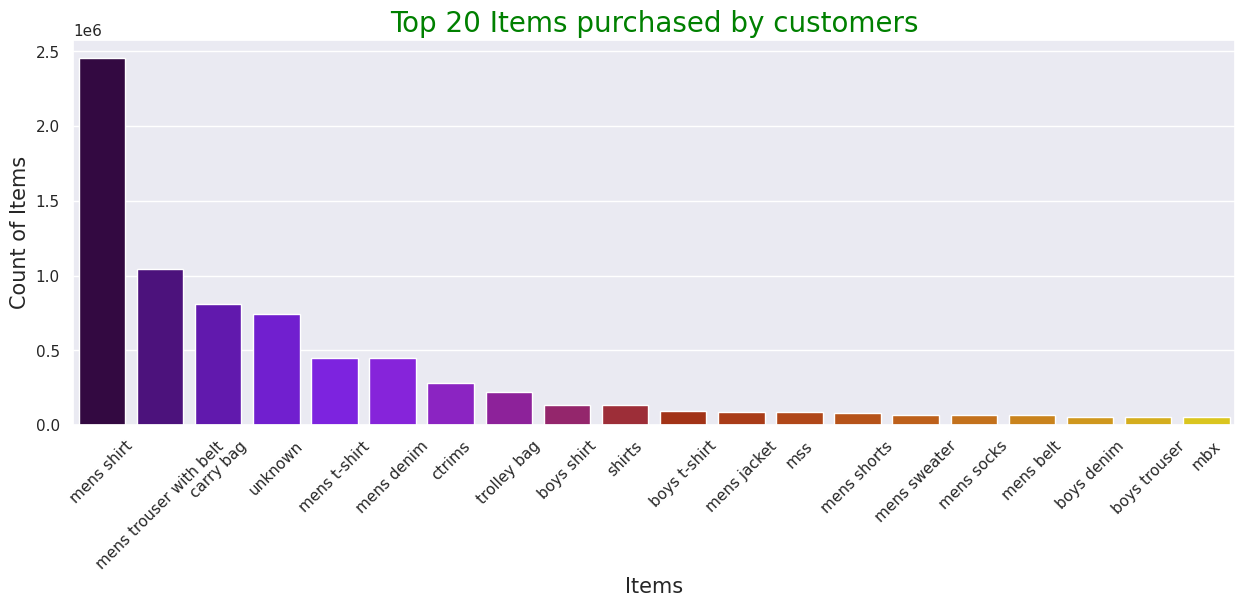

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x = retail['product'].value_counts().head(20).index, 
            y = retail['product'].value_counts().head(20).values, 
            palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()


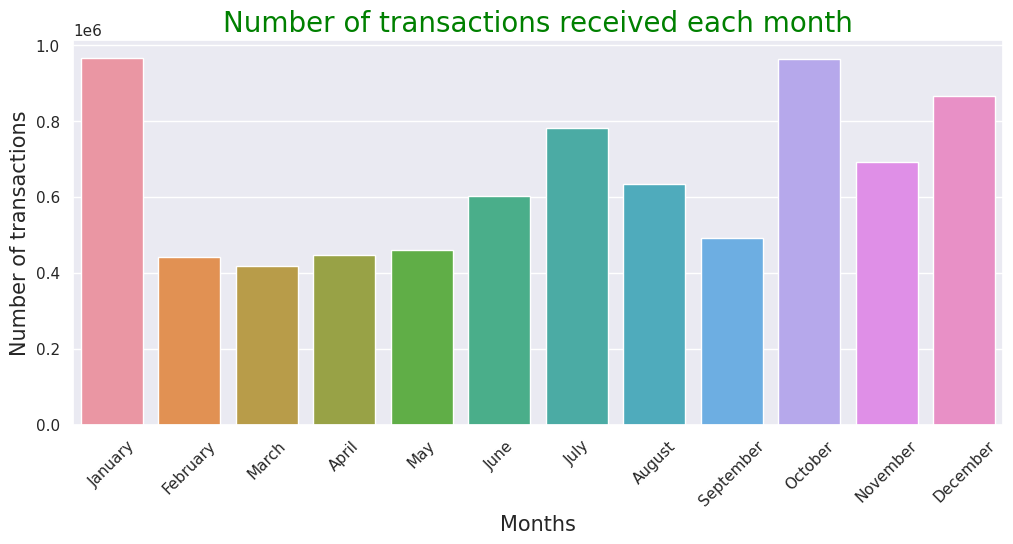

In [39]:
# Count transactions per month
month_tran = retail.groupby('month')['bill_id'].count().reset_index()

# Map months to their order for sorting
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
month_tran['month_order'] = month_tran['month'].map(month_order)

# Sort by month order
month_tran.sort_values("month_order", inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=month_tran, x="month", y="bill_id")
plt.xlabel('Months', size=15)
plt.ylabel('Number of transactions', size=15)
plt.title('Number of transactions received each month', color='green', size=20)
plt.xticks(rotation=45) 
plt.show()


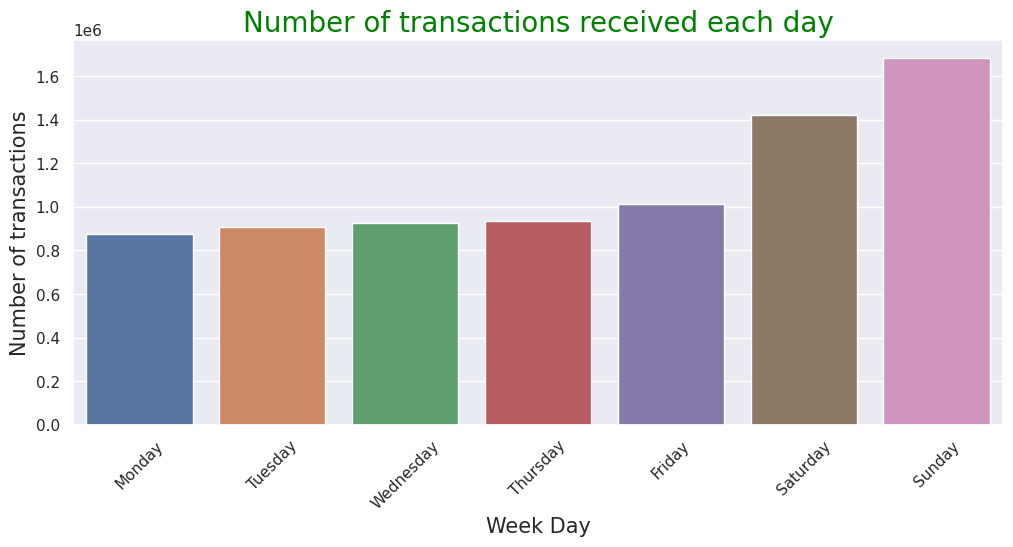

In [40]:
# Count transactions per weekday
week_tran = retail.groupby('weekday')['bill_id'].count().reset_index()

# Manually define the order of weekdays for sorting
weekday_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
week_tran['weekday_order'] = week_tran['weekday'].map(weekday_order)

# Sort by weekday order
week_tran.sort_values("weekday_order", inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=week_tran, x="weekday", y="bill_id")
plt.xlabel('Week Day', size=15)
plt.ylabel('Number of transactions', size=15)
plt.title('Number of transactions received each day', color='green', size=20)
plt.xticks(rotation=45)
plt.show()


In [41]:
# Count item occurrences within each transaction
transactions_str = (
    retail.groupby(['bill_id', 'product'])['product']
    .count()
    .reset_index(name='count')
)

print(transactions_str.head().to_markdown(index=False, numalign="left", stralign="left"))


| bill_id   | product    | count   |
|:----------|:-----------|:--------|
| 360301332 | unknown    | 2       |
| 360302425 | unknown    | 2       |
| 360304072 | unknown    | 1       |
| 360304673 | mens denim | 1       |
| 360304720 | denim      | 1       |


In [42]:
# Create a transaction-item matrix (pivot table)
basket_matrix = (
    transactions_str.pivot_table(index='bill_id', columns='product', values='count', aggfunc='sum')
    .fillna(0)
)

# Binarize the matrix (0 or 1)
basket_matrix = (basket_matrix > 0).astype(int)

# Display the first 5 rows of the basket matrix
print(basket_matrix.head().to_markdown(index=False, numalign="left", stralign="left"))


| b   | bbg   | bcp   | bmk   | boys denim   | boys denim trouser - jeanswear   | boys jacket   | boys jogger   | boys shirt   | boys shorts   | boys sweater   | boys t-shirt   | boys trouser   | bss   | btie   | bwc   | carry bag   | cothers   | ctrims   | denim   | duffelbag   | ffb   | fft   | hhp   | lbg   | male tie   | mb   | mbx   | mens bandi   | mens belt   | mens denim   | mens denim trouser   | mens footwear   | mens jacket   | mens jogger   | mens knit trouser   | mens shirt   | mens shorts   | mens socks   | mens sportscoat   | mens sweater   | mens t-shirt   | mens trouser   | mens trouser with belt   | mens wallet - sportswear   | mmk   | mrg   | ms   | mss   | shirts   | soap   | trolley bag   | unknown   | wlt   | wothers   |
|:----|:------|:------|:------|:-------------|:---------------------------------|:--------------|:--------------|:-------------|:--------------|:---------------|:---------------|:---------------|:------|:-------|:------|:------------|:----------|:

In [43]:
# Create a transaction-item matrix (pivot table)
basket_matrix = (
    retail.groupby(['bill_id', 'product'])['product'].count()
    .unstack(fill_value=0)  
    .reset_index()
    .rename_axis(None, axis=1) 
)

# Binarize the matrix (0 or 1)
basket_matrix.iloc[:, 1:] = (basket_matrix.iloc[:, 1:] > 0).astype(int)

print(basket_matrix.head().to_markdown(index=False, numalign="left", stralign="left"))


| bill_id     | b   | bbg   | bcp   | bmk   | boys denim   | boys denim trouser - jeanswear   | boys jacket   | boys jogger   | boys shirt   | boys shorts   | boys sweater   | boys t-shirt   | boys trouser   | bss   | btie   | bwc   | carry bag   | cothers   | ctrims   | denim   | duffelbag   | ffb   | fft   | hhp   | lbg   | male tie   | mb   | mbx   | mens bandi   | mens belt   | mens denim   | mens denim trouser   | mens footwear   | mens jacket   | mens jogger   | mens knit trouser   | mens shirt   | mens shorts   | mens socks   | mens sportscoat   | mens sweater   | mens t-shirt   | mens trouser   | mens trouser with belt   | mens wallet - sportswear   | mmk   | mrg   | ms   | mss   | shirts   | soap   | trolley bag   | unknown   | wlt   | wothers   |
|:------------|:----|:------|:------|:------|:-------------|:---------------------------------|:--------------|:--------------|:-------------|:--------------|:---------------|:---------------|:---------------|:------|:-------|:------

In [44]:
# Apply Apriori algorithm (use the basket_matrix directly)
frequent_itemsets = apriori(basket_matrix.set_index('bill_id'), min_support=0.01, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.016696,(boys denim)
1,0.035111,(boys shirt)
2,0.021709,(boys t-shirt)
3,0.016331,(boys trouser)
4,0.342581,(carry bag)
...,...,...
65,0.027408,"(mens trouser with belt, mens shirt, mens denim)"
66,0.014972,"(trolley bag, mens shirt, mens denim)"
67,0.017818,"(mens trouser with belt, mens shirt, mens t-sh..."
68,0.029492,"(mens trouser with belt, trolley bag, mens shirt)"


In [45]:


# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by confidence (descending)
rules.sort_values('confidence', ascending=False, inplace=True)

# Display the rules
print(rules.head(10).to_markdown(index=False, numalign="left", stralign="left"))


| antecedents                                                      | consequents               | antecedent support   | consequent support   | support   | confidence   | lift    | leverage   | conviction   |
|:-----------------------------------------------------------------|:--------------------------|:---------------------|:---------------------|:----------|:-------------|:--------|:-----------|:-------------|
| frozenset({'trolley bag', 'ctrims'})                             | frozenset({'mens shirt'}) | 0.023204             | 0.547948             | 0.0185446 | 0.799199     | 1.45853 | 0.00583002 | 2.25125      |
| frozenset({'mens trouser with belt', 'trolley bag'})             | frozenset({'mens shirt'}) | 0.0382249            | 0.547948             | 0.0294924 | 0.771548     | 1.40807 | 0.00854712 | 1.97877      |
| frozenset({'trolley bag'})                                       | frozenset({'mens shirt'}) | 0.0876982            | 0.547948             | 0.0667005 | 0.760568     

In [46]:
rules.sort_values('confidence', ascending=False, inplace=True) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
86,"(trolley bag, ctrims)",(mens shirt),0.023204,0.547948,0.018545,0.799199,1.458532,0.005830,2.251246
120,"(mens trouser with belt, trolley bag)",(mens shirt),0.038225,0.547948,0.029492,0.771548,1.408069,0.008547,1.978766
38,(trolley bag),(mens shirt),0.087698,0.547948,0.066700,0.760568,1.388031,0.018646,1.888023
64,"(carry bag, trolley bag)",(mens shirt),0.026784,0.547948,0.020156,0.752533,1.373366,0.005480,1.826714
111,"(trolley bag, mens denim)",(mens shirt),0.019918,0.547948,0.014972,0.751679,1.371809,0.004058,1.820438
...,...,...,...,...,...,...,...,...,...
79,(mens shirt),"(ctrims, mens denim)",0.547948,0.021295,0.014459,0.026387,1.239110,0.002790,1.005230
137,(mens shirt),"(carry bag, mens trouser with belt, mens denim)",0.547948,0.016210,0.012108,0.022097,1.363139,0.003226,1.006020
101,(mens shirt),"(mens t-shirt, mens denim)",0.547948,0.017486,0.011340,0.020696,1.183540,0.001759,1.003277
33,(mens shirt),(mens socks),0.547948,0.018985,0.010889,0.019872,1.046710,0.000486,1.000905


## **Sales RFM cluster**

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ensure the 'transaction_date' column is in datetime format
total['transaction_date'] = pd.to_datetime(total['transaction_date'])

# Take a fraction (1%) of the data for testing
total_sample = total

# Calculate Recency
current_date = total_sample['transaction_date'].max() + pd.Timedelta(days=1)
total_sample['days_since_last_transaction'] = (current_date - total_sample['transaction_date']).dt.days





In [48]:

# Calculate Recency, Frequency, and Monetary Value
rfm_r = total_sample.groupby('user_id')['days_since_last_transaction'].min().reset_index()
rfm_r.columns = ['user_id', 'recency']

rfm_f = total_sample.groupby('user_id')['bill_id'].nunique().reset_index()
rfm_f.columns = ['user_id', 'frequency']

# Calculate the transaction_value: sum of line_item_amount - first of bill_discount on each bill
total_sample['transaction_value'] = total_sample.groupby('bill_id').apply(
    lambda x: max(x['line_item_amount'].sum() - x['bill_discount'].iloc[0], 0)
).reset_index(level=0, drop=True)

rfm_m = total_sample.groupby('user_id')['transaction_value'].sum().reset_index()
rfm_m.columns = ['user_id', 'monetary_value']

In [49]:

# Merge R, F, M dataframes
rfm = rfm_r.merge(rfm_f, on='user_id').merge(rfm_m, on='user_id')


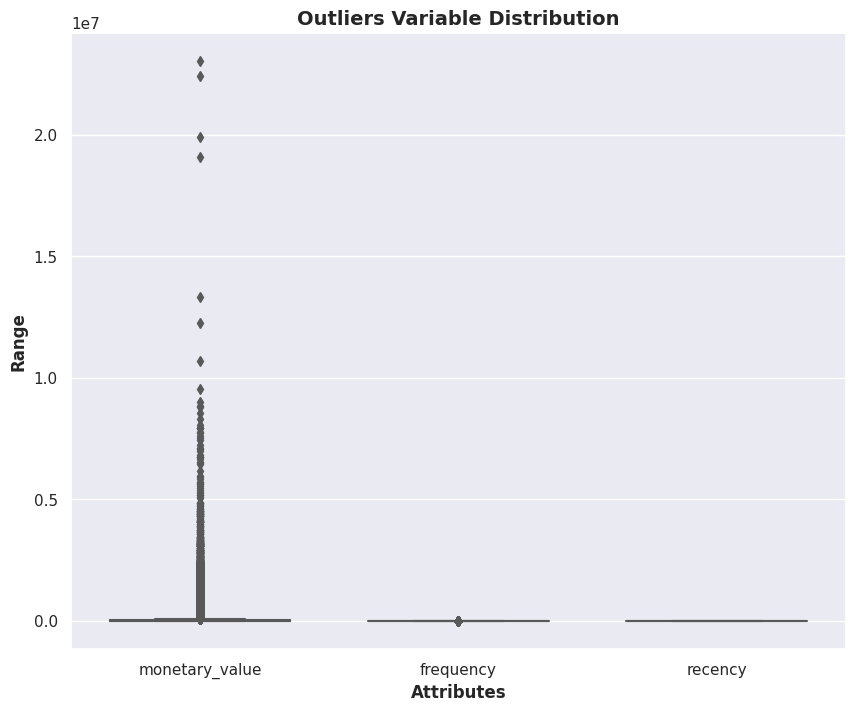

In [50]:
# Outlier Analysis of Monetary Value, Frequency, and Recency

attributes = ['monetary_value', 'frequency', 'recency']
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxplot(data=rfm[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.show()


In [51]:
# Removing (statistical) outliers for monetary_value
Q1 = rfm.monetary_value.quantile(0.05)
Q3 = rfm.monetary_value.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary_value >= Q1 - 1.5 * IQR) & (rfm.monetary_value <= Q3 + 1.5 * IQR)]

# Removing (statistical) outliers for recency
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5 * IQR) & (rfm.recency <= Q3 + 1.5 * IQR)]

# Removing (statistical) outliers for frequency
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5 * IQR) & (rfm.frequency <= Q3 + 1.5 * IQR)]


In [52]:
# Rescaling the attributes

rfm_df = rfm[['monetary_value', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Check the shape of the scaled data
rfm_df_scaled.shape


(946252, 3)

In [53]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)

# Assign the labels to a new column in the original DataFrame
rfm['Cluster'] = kmeans.labels_



In [54]:
# Display the labels
print(kmeans.labels_)

[0 2 0 ... 0 0 0]


In [55]:
# Convert the scaled data back into a DataFrame
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['monetary_value', 'frequency', 'recency'])

# Display the first few rows of the scaled DataFrame
rfm_df_scaled.head()

,monetary_value,frequency,recency
0,0.300679,0.218030,-0.976031
1,3.905417,6.408098,-0.659096
2,-0.076500,0.905815,-0.809684
3,1.901798,4.344742,-1.093350
4,-0.559044,-0.469756,-0.107524


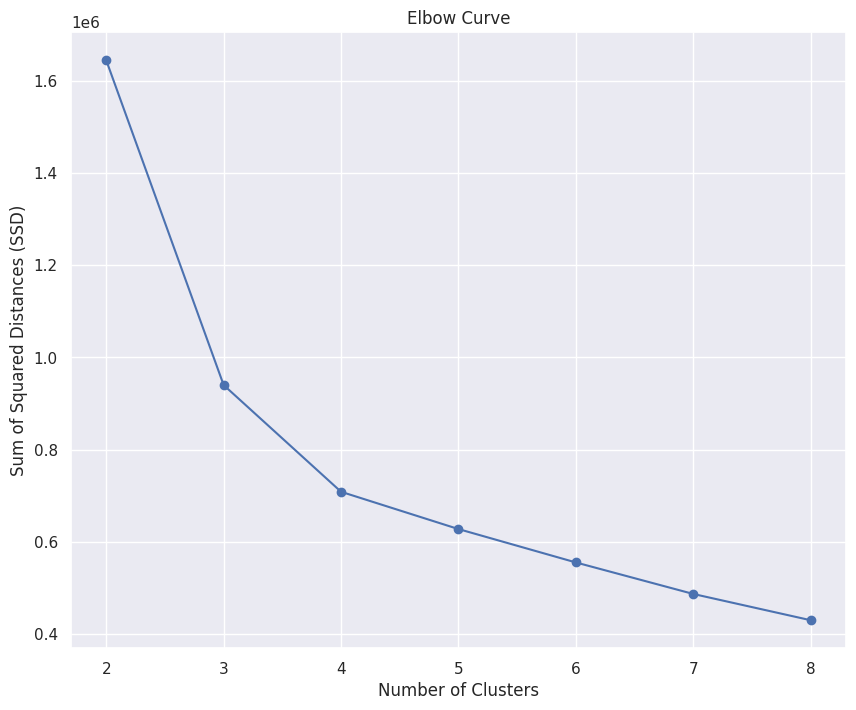

In [56]:

# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()


In [57]:
# Load the model
loaded_kmeans = joblib.load('/home/toan/Prethesis/kmeans_model.pkl')

print("K-means model loaded successfully")

# You can now use the loaded model for prediction or further analysis
clusters = loaded_kmeans.predict(rfm_df_scaled)
print(clusters)

K-means model loaded successfully
[1 3 1 ... 1 1 1]


In [58]:
# from sklearn.metrics import silhouette_score

# # Silhouette analysis
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# for num_clusters in range_n_clusters:
    
#     # Initialize kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
#     kmeans.fit(rfm_df_scaled)
    
#     cluster_labels = kmeans.labels_
    
#     # Compute the silhouette score
#     silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


In [59]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

# Assign the cluster labels to the original dataframe
rfm['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
rfm.head()


,user_id,recency,frequency,monetary_value,Cluster
0,50049,205,2,49497.0043,0
1,50174,386,11,226416.9146,2
2,50511,300,3,30985.1512,0
3,50565,138,8,128079.6304,2
4,53762,701,1,7302.0010,0


In [60]:
kmeans.labels_
cluster_labels = kmeans.labels_

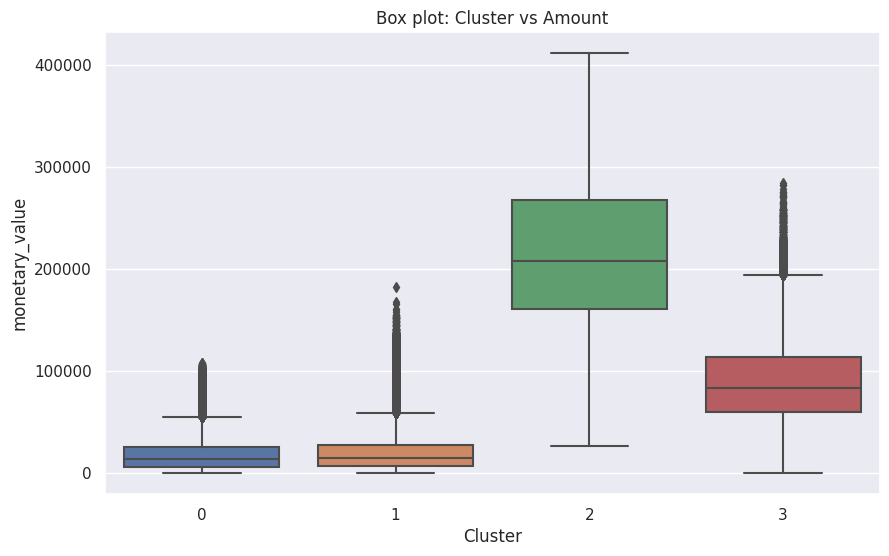

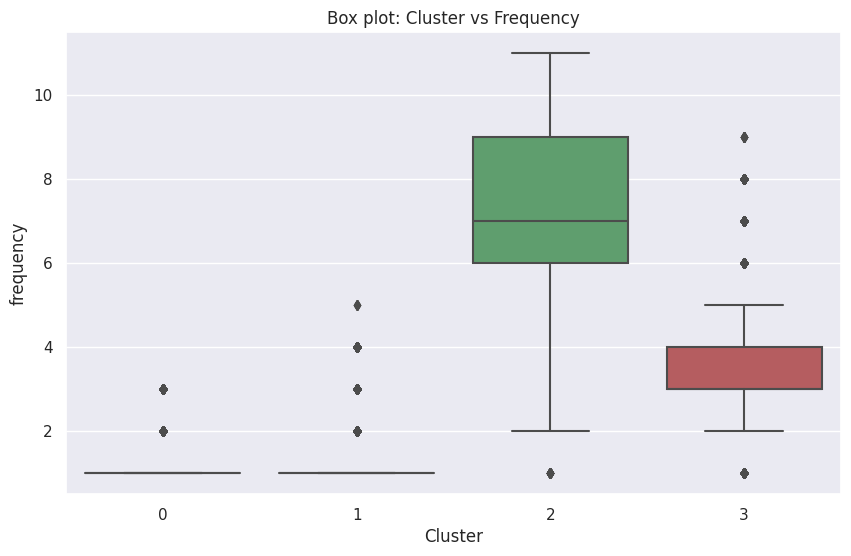

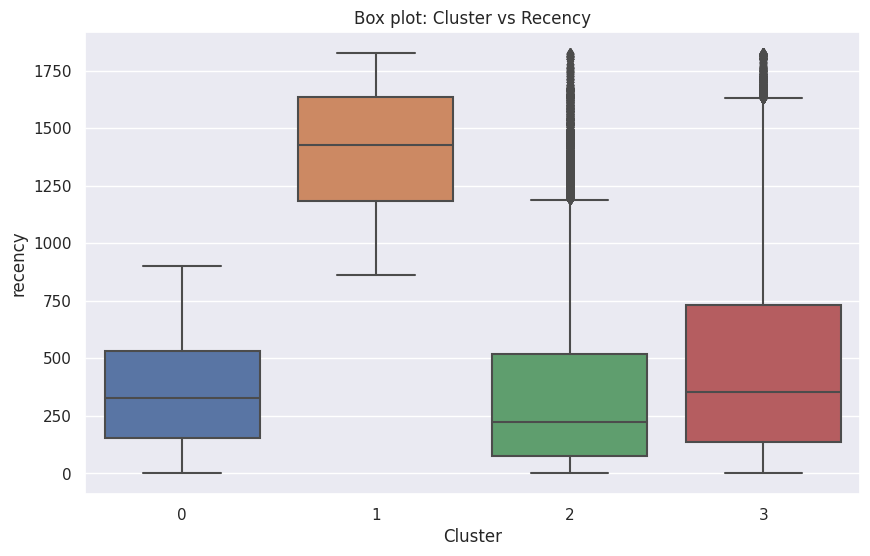

In [61]:
# Box plot to visualize Cluster vs Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='monetary_value', data=rfm)
plt.title('Box plot: Cluster vs Amount')
plt.show()

# Box plot to visualize Cluster vs Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='frequency', data=rfm)
plt.title('Box plot: Cluster vs Frequency')
plt.show()

# Box plot to visualize Cluster vs Recency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='recency', data=rfm)
plt.title('Box plot: Cluster vs Recency')
plt.show()


In [62]:
# Save the model
joblib_file = "kmeans_model.pkl"
joblib.dump(kmeans, joblib_file)

print(f"K-means model saved to {joblib_file}")

K-means model saved to kmeans_model.pkl


In [63]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,user_id,recency,frequency,monetary_value,Cluster,Cluster_Labels
0,50049,205,2,49497.0043,0,0
1,50174,386,11,226416.9146,2,2
2,50511,300,3,30985.1512,0,0
3,50565,138,8,128079.6304,2,2
4,53762,701,1,7302.0010,0,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='monetary_value'>

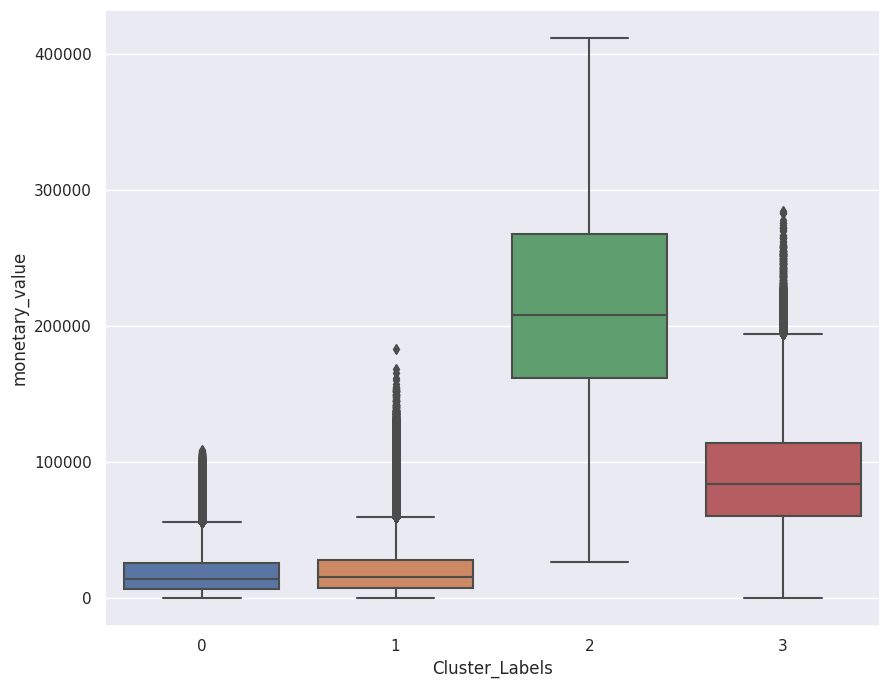

In [64]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='monetary_value', data=rfm)

In [65]:
# Calculate min and max for each cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'recency': ['min', 'max'],
    'frequency': ['min', 'max'],
    'monetary_value': ['min', 'max']
}).reset_index()

# Display the summary
print(cluster_summary)

  Cluster recency       frequency     monetary_value             
              min   max       min max            min          max
0       0       1   900         1   3            0.0  108395.0030
1       1     864  1826         1   5            0.0  182878.1036
2       2       1  1826         1  11        26598.2  411493.1510
3       3       1  1825         1   9            0.0  284681.9994


In [66]:
total['user_id'].nunique()


964818

In [67]:
print(rfm.head())

   user_id  recency  frequency  monetary_value  Cluster  Cluster_Labels
0    50049      205          2      49497.0043        0               0
1    50174      386         11     226416.9146        2               2
2    50511      300          3      30985.1512        0               0
3    50565      138          8     128079.6304        2               2
4    53762      701          1       7302.0010        0               0


## **New K-mean with model evaluation**

In [3]:
df1 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2018.csv', parse_dates=['transaction_date'])
df2 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2019.csv', parse_dates=['transaction_date'])
df3 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2020.csv', parse_dates=['transaction_date'])
df4 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2021.csv', parse_dates=['transaction_date'])
df5 = pd.read_csv('/mnt/c/Users/PC/Desktop/Prethesis/data_csv/data_2022.csv', parse_dates=['transaction_date'])


In [6]:
total1 = pd.concat([df1,df2,df3,df4,df5],axis=0)
print(total1.shape)
total1.sample(5)

(8454383, 12)


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
204077,270341479,768117201,2199.0000,0.0,2022-10-08,MSH ITMSH04360 Slim LS Olive XL,MSH ITMSH04360 Slim LS Olive XL,NOT-CAPTURED,NOT-CAPTURED,South,South_7414,2022
1587788,483101548,612516942,1771.7375,0.0,2021-03-12,MSH ITMSH02002 Slim LS Black XL,MSH ITMSH02002 Slim LS Black XL,Black,XL,North,North_7159,2021
832936,509131835,711408131,2199.0000,0.0,2022-04-04,MSH ITMSH04360 Slim LS White XL,MSH ITMSH04360 Slim LS White XL,NOT-CAPTURED,NOT-CAPTURED,South,South_7158,2022
1266073,174536320,640034360,2399.0000,0.0,2021-08-12,MSH ITMSH03040 Slim SS INK 2XL,NaN,INK,2XL,South,South_7467,2021
2504326,296401201,753991594,2102.6810,0.0,2022-08-19,MTR ITMTR00890 Brooklyn FF Grey 36,MTR ITMTR00890 Brooklyn FF Grey 36,NOT-CAPTURED,NOT-CAPTURED,Central,Central_7209,2022


In [24]:
total2 = total1.sample(frac=0.02, random_state=42)
total2.shape 

(169088, 12)

In [25]:
# Preprocess the data
total2['colour'].fillna('UNKNOWN', inplace=True)
total2['size'].fillna('UNKNOWN', inplace=True)
total2.dropna(inplace=True)
total2['transaction_date'] = pd.to_datetime(total2['transaction_date'])


In [26]:
import datetime as dt
# Define the current date for calculating recency
current_date = dt.datetime(2022, 1, 1)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = total2.groupby('user_id').agg({
    'transaction_date': lambda x: (current_date - x.max()).days,
    'bill_id': 'count',
    'line_item_amount': 'sum'
}).reset_index()


In [27]:
# Rename the columns
rfm.columns = ['user_id', 'recency', 'frequency', 'monetary']
rfm.shape

(114153, 4)

In [28]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train, test = train_test_split(rfm, test_size=0.3, random_state=42)


In [29]:
# Normalize the RFM values
scaler = StandardScaler()
train_normalized = scaler.fit_transform(train[['recency', 'frequency', 'monetary']])
test_normalized = scaler.transform(test[['recency', 'frequency', 'monetary']])

In [30]:
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using the elbow method and silhouette score
wcss = []
silhouette_scores = []
range_n_clusters = range(2, 8)  # Starting from 2 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(train_normalized)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(train_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)


In [ ]:
# Plot the elbow method graph
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
# Determine the optimal number of clusters based on the highest silhouette score
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_clusters}')




Optimal number of clusters: 2


KeyboardInterrupt: 

In [ ]:
# Apply K-means clustering with the optimal number of clusters on training data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
train['cluster'] = kmeans.fit_predict(train_normalized)

# Predict clusters for the testing data
test['cluster'] = kmeans.predict(test_normalized)


In [ ]:
# Evaluate the model using silhouette score
train_silhouette = silhouette_score(train_normalized, train['cluster'])
test_silhouette = silhouette_score(test_normalized, test['cluster'])
print(f'Training Silhouette Score: {train_silhouette}')
print(f'Testing Silhouette Score: {test_silhouette}')

In [ ]:
# Summarize RFM metrics for each cluster in the training set
cluster_summary = train.groupby('cluster').agg({
    'recency': ['mean', 'std'],
    'frequency': ['mean', 'std'],
    'monetary': ['mean', 'std'],
    'user_id': 'count'
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = ['cluster', 'recency_mean', 'recency_std', 'frequency_mean', 'frequency_std', 'monetary_mean', 'monetary_std', 'count']

# Display the cluster summary
print(cluster_summary)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings_average = linkage(rfm_df_scaled,method="average", metric='euclidean')

MemoryError: Unable to allocate 3.26 TiB for an array with shape (447695950626,) and data type float64

## **Apply NtreeClus**

In [ ]:
import nTreeClus
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming 'total' is your DataFrame with combined data
retail = total.dropna()

# Sample a fraction of the data (10%)
retail_sample = retail.sample(frac=0.1, random_state=42)

# Standardize Numerical Features
scaler = StandardScaler()
numerical_features = ['line_item_amount', 'bill_discount']

if all(feature in retail_sample.columns for feature in numerical_features):
    retail_sample[numerical_features] = scaler.fit_transform(retail_sample[numerical_features])
else:
    print("Missing numerical features in the DataFrame.")

# Encode Categorical Feature (month)
le = LabelEncoder()
retail_sample['month_encoded'] = le.fit_transform(retail_sample['month'])

# Function to Convert Labels to Numerical Values (adapted for product)
def convert_label_to_values(column):
    unique_labels = list(column.unique())
    n_labels = len(unique_labels)
    map_dict = dict(zip(unique_labels, range(n_labels)))
    return column.map(map_dict)

In [ ]:
# Prepare Data for nTreeClus
labels_sample = list(convert_label_to_values(retail_sample['product']))
sequences_sample = list(retail_sample['product'].astype(str))

# Combine Features
features_sample = retail_sample['product'].astype(str) + ' ' + retail_sample['product'] + ' ' + \
                  retail_sample['line_item_amount'].astype(str) + ' ' + \
                  retail_sample['month_encoded'].astype(str)


In [ ]:
retail_sample

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday,desc_copy,product,ic_copy,days_since_last_transaction,transaction_value,month_encoded
1613879,437452614,505564981,2.814187,-0.102933,2019-10-22,MWC ITMWC00001 Bandi SL Dark Green M,MWC ITMWC00001 Bandi SL Dark Green M,Dark Green,M,West,West_7403,2019,October,Tuesday,MWC ITMWC00001 Bandi SL Dark Green M,MENS BANDI,MWC ITMWC00001 Bandi SL Dark Green M,1167,2299.0010,10
992097,415445247,436333490,0.455014,-0.102933,2019-01-20,MDE ITMDN00084 Brooklyn 5P Light Wash 32,MENS Denim Trouser,Light Wash,32,West,West_7056,2019,January,Sunday,MDE ITMDN00084 Brooklyn 5P Light Wash 32,MENS DENIM,MENS Denim Trouser,1442,8011.9998,4
1579552,440899742,722760946,0.881252,-0.102933,2022-05-08,MTR ITMTR00715 Brooklyn FF Navy 38,MTR ITMTR00715 Brooklyn FF Navy 38,Unknown,38,South,South_7121,2022,May,Sunday,MTR ITMTR00715 Brooklyn FF Navy 38,MENS TROUSER WITH BELT,MTR ITMTR00715 Brooklyn FF vy 38,238,5248.0030,8
459843,491330778,662934110,0.193843,0.466745,2021-11-13,MDE ITMDN00863 Brooklyn 5P Md Wash 28,MDE ITMDN00863 Brooklyn 5P Md Wash 28,Md Wash,28,South,South_7045,2021,November,Saturday,MDE ITMDN00863 Brooklyn 5P Md Wash 28,MENS DENIM,MDE ITMDN00863 Brooklyn 5P Md Wash 28,414,6616.0000,9
1069226,447210164,537072605,-0.331272,-0.102933,2020-02-05,MTR ITMTR00342 Kansas FF Stone 36,MTR ITMTR00342 Kansas FF Stone 36,Stone,36,South,South_7130,2020,February,Wednesday,MTR ITMTR00342 Kansas FF Stone 36,MENS TROUSER WITH BELT,MTR ITMTR00342 Kansas FF Stone 36,1061,1599.0000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172159,437541250,535110261,-0.698303,-0.102933,2020-01-28,BSS ITBSS00029 Regular LS Ochre L,BSS ITBSS00029 Regular LS Ochre L,Ochre,L,North,North_7191,2020,January,Tuesday,BSS ITBSS00029 Regular LS Ochre L,BSS,BSS ITBSS00029 Regular LS Ochre L,1069,5097.9998,4
407973,391060915,367427951,0.821731,-0.102933,2018-02-12,ITMSH00148,Mens Shirt - Jeanswear,Maroon,M,North,North_7039,2018,February,Monday,ITMSH00148,Unknown,Mens Shirt - Jeanswear,1784,4383.8000,3
57234,399817811,391072543,0.303369,-0.102933,2018-06-19,ITMSH00290,Mens Shirt - Sportswear,Rust,S,North,North_7039,2018,June,Tuesday,ITMSH00290,Unknown,Mens Shirt - Sportswear,1657,2096.0000,6
1581846,436620884,745466928,0.568183,-0.102933,2022-07-21,MDE ITMDN00779 Brooklyn 5P Rinse 40,MDE ITMDN00779 Brooklyn 5P Rinse 40,Rinse,40,West,West_7435,2022,July,Thursday,MDE ITMDN00779 Brooklyn 5P Rinse 40,MENS DENIM,MDE ITMDN00779 Brooklyn 5P Rinse 40,164,3868.2020,5


In [ ]:
features_sample

1613879           MENS BANDI MENS BANDI 2.814186769869566 10
992097           MENS DENIM MENS DENIM 0.45501410567730005 4
1579552    MENS TROUSER WITH BELT MENS TROUSER WITH BELT ...
459843           MENS DENIM MENS DENIM 0.19384256545794723 9
1069226    MENS TROUSER WITH BELT MENS TROUSER WITH BELT ...
                                 ...                        
172159                         BSS BSS -0.6983032682297339 4
407973                  Unknown Unknown 0.8217308593191347 3
57234                  Unknown Unknown 0.30336912525411125 6
1581846           MENS DENIM MENS DENIM 0.5681833992084531 5
1063128    MENS TROUSER WITH BELT MENS TROUSER WITH BELT ...
Length: 719460, dtype: object

In [ ]:
# Initialize and Run nTreeClus
n_clusters = len(retail_sample['description'].unique())
model_sample = nTreeClus.nTreeClus(features_sample, n=100, ntree=10, method="All", verbose=1, C=n_clusters)
model_sample.nTreeClus()

# Evaluate Performance (using description as ground truth)
model_sample.performance(Ground_Truth=labels_sample)

# Dendrogram Visualization
from matplotlib import pyplot as plt

fig, ax = model_sample.plot('DT_position', retail_sample['store_name'].values, color_threshold=0.88, linkage_method='ward', annotate=True, xy=(50, 1.7), save=True)
plt.show()

# Executing Time (sec.)
print(f"""
      running_time Matrix Segmentation: {model_sample.running_timeSegmentation},
      running_time DT: {model_sample.running_timeDT},
      running_time DT_p: {model_sample.running_timeDT_p},
      running_time RF: {model_sample.running_timeRF},
      running_time RF_p: {model_sample.running_timeRF_p}.
      """)


Matrix Segmentation (Splitting based on window size):   0%|          | 0/719460 [00:00<?, ?it/s]


KeyError: 3

In [ ]:

# System Information
import platform, json, psutil, logging, cpuinfo

def getSystemInfo():
    try:
        info = {}
        info['platform'] = platform.system()
        info['platform-release'] = platform.release()
        info['platform-version'] = platform.version()
        info['architecture'] = platform.machine()
        info['processor'] = f"Processor: {cpuinfo.get_cpu_info()['brand_raw']}"
        info['ram'] = str(round(psutil.virtual_memory().total / (1024.0 **3))) + " GB"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

### **Debug**

In [ ]:
import nTreeClus
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming 'total' is your DataFrame with combined data
retail = total.dropna()

# Sample a fraction of the data (10%)
retail_sample = retail.sample(frac=0.1, random_state=42)

# Print the first few rows of the sample for debugging
print("Sampled data (retail_sample):")
print(retail_sample.head())

# Standardize Numerical Features
scaler = StandardScaler()
numerical_features = ['line_item_amount', 'bill_discount']

# Check if numerical features exist in the DataFrame
if all(feature in retail_sample.columns for feature in numerical_features):
    retail_sample[numerical_features] = scaler.fit_transform(retail_sample[numerical_features])
    print("Numerical features standardized:")
    print(retail_sample[numerical_features].head())
else:
    print("Missing numerical features in the DataFrame.")
    print("Available columns:", retail_sample.columns)

# Encode Categorical Feature (month)
le = LabelEncoder()
if 'month' in retail_sample.columns:
    retail_sample['month_encoded'] = le.fit_transform(retail_sample['month'])
    print("Month column encoded:")
    print(retail_sample[['month', 'month_encoded']].head())
else:
    print("Column 'month' is missing from the DataFrame.")

# Function to Convert Labels to Numerical Values (adapted for product)
def convert_label_to_values(column):
    unique_labels = list(column.unique())
    n_labels = len(unique_labels)
    map_dict = dict(zip(unique_labels, range(n_labels)))
    return column.map(map_dict)

# Prepare Data for nTreeClus
if 'product' in retail_sample.columns:
    labels_sample = list(convert_label_to_values(retail_sample['product']))
    sequences_sample = list(retail_sample['product'].astype(str))
    print("Labels and sequences prepared:")
    print(labels_sample[:10])
    print(sequences_sample[:10])
else:
    print("Column 'product' is missing from the DataFrame.")

# Combine Features
if all(col in retail_sample.columns for col in ['product', 'line_item_amount', 'month_encoded']):
    features_sample = retail_sample['product'].astype(str) + ' ' + retail_sample['product'] + ' ' + \
                      retail_sample['line_item_amount'].astype(str) + ' ' + \
                      retail_sample['month_encoded'].astype(str)
    print("Combined features sample:")
    print(features_sample.head())
else:
    print("One or more columns are missing from the DataFrame for feature combination.")
    print("Available columns:", retail_sample.columns)

# Validate combined features input to nTreeClus
print("Validating input features for nTreeClus:")
try:
    assert isinstance(features_sample, pd.Series), "features_sample is not a pandas Series"
    assert all(isinstance(x, str) for x in features_sample), "Not all features are strings"
    print("Input features validation passed.")
except AssertionError as e:
    print("Input features validation failed:", e)

# Ensure labels and features have the same length
assert len(features_sample) == len(labels_sample), "Mismatch in length between features and labels"

# Print lengths and types of features and labels
print(f"Length of features_sample: {len(features_sample)}")
print(f"Type of features_sample: {type(features_sample)}")
print(f"Length of labels_sample: {len(labels_sample)}")
print(f"Type of labels_sample: {type(labels_sample)}")

# Initialize and Run nTreeClus
n_clusters = len(retail_sample['product'].unique())
print("Number of clusters:", n_clusters)

# Print first few combined features for further debugging
print("First few combined features for nTreeClus input:")
print(features_sample.head())

# Initialize and Run nTreeClus
model_sample = nTreeClus.nTreeClus(features_sample, n=100, ntree=10, method="All", verbose=1, C=n_clusters)
model_sample.nTreeClus()

# Evaluate Performance (using product as ground truth)
model_sample.performance(Ground_Truth=labels_sample)

# Dendrogram Visualization
from matplotlib import pyplot as plt

fig, ax = model_sample.plot('DT_position', retail_sample['store_name'].values, color_threshold=0.88, linkage_method='ward', annotate=True, xy=(50, 1.7), save=True)
plt.show()

# Executing Time (sec.)
print(f"""
      running_time Matrix Segmentation: {model_sample.running_timeSegmentation},
      running_time DT: {model_sample.running_timeDT},
      running_time DT_p: {model_sample.running_timeDT_p},
      running_time RF: {model_sample.running_timeRF},
      running_time RF_p: {model_sample.running_timeRF_p}.
      """)

# System Information
import platform, json, psutil, logging, cpuinfo

def getSystemInfo():
    try:
        info = {}
        info['platform'] = platform.system()
        info['platform-release'] = platform.release()
        info['platform-version'] = platform.version()
        info['architecture'] = platform.machine()
        info['processor'] = f"Processor: {cpuinfo.get_cpu_info()['brand_raw']}"
        info['ram'] = str(round(psutil.virtual_memory().total / (1024.0 **3))) + " GB"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())


Sampled data (retail_sample):
           user_id    bill_id  line_item_amount  bill_discount  \
1281622  518652242  739069736            2.0000            0.0   
399950   508187103  707369058         2399.0000            0.0   
1465997  421172722  456331071         1169.0221            0.0   
878824   521704688  748120169         1102.0013            0.0   
353499   455862649  736740099         1948.1180            0.0   

        transaction_date                            description  \
1281622       2022-07-01  CTRIMS ITCBM00003 NA NA WHITE 10X4X14   
399950        2022-03-21          MSH ITMSH03590 Slim SS Navy M   
1465997       2019-04-20     BSH ITBSH00264 Regular LS Navy EES   
878824        2022-07-31     MSH ITMSH02043 Slim LS Dark Pink M   
353499        2022-06-22         MSH ITMSH04082 Slim LS White M   

                                  inventory_category     colour     size  \
1281622  CTrims ITCBM00003 NA NA White ``10x4x14````      White  10x4x14   
399950            

Matrix Segmentation (Splitting based on window size):   0%|          | 1/775693 [00:00<3:01:00, 71.42it/s]


KeyError: 1